# Duncan Conly ID : 010958878

Machine Learning Assignment 4

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# loading the data set
from sklearn.datasets import load_iris
# from mlxtend.plotting import plot_decicion_regions


iris = load_iris()

X = iris.data
y = iris.target

# Select only the classes 0 and 1 
X=X[y!=2]
y=y[y!=2]

X = X[:,:2]

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [28]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# i) SVM classifier with a Polynomial Kernel

In [30]:

C = 1
poly_D = [2,3,5,6,9]
poly_train_acc = []
poly_test_acc = []

for D in poly_D :
    SVM_poly = SVC(kernel = 'poly', C = C, degree = D, random_state=42)
    SVM_poly.fit(X_train, y_train)
    train_acc = SVM_poly.score(X_train, y_train)
    test_acc = SVM_poly.score(X_test, y_test)
    poly_train_acc.append(train_acc)
    poly_test_acc.append(test_acc)
    print(f"Poly SVM for C=1 & D = {D} : Train acc = {train_acc:.3f}, {train_acc:.3f}")

Poly SVM for C=1 & D = 2 : Train acc = 0.586, 0.586
Poly SVM for C=1 & D = 3 : Train acc = 0.986, 0.986
Poly SVM for C=1 & D = 5 : Train acc = 0.857, 0.857
Poly SVM for C=1 & D = 6 : Train acc = 0.571, 0.571
Poly SVM for C=1 & D = 9 : Train acc = 0.814, 0.814


# ii) Radial Basis kernel

In [31]:


C = 1
radial_G = [0.001,0.01,0.1,1]
radial_train_acc = []
radial_test_acc = []

for G in radial_G :
    SVM_radial = SVC(kernel = 'rbf', C = C, gamma = G, random_state=42)
    SVM_radial.fit(X_train, y_train)
    train_acc = SVM_radial.score(X_train, y_train)
    test_acc = SVM_radial.score(X_test, y_test)
    radial_train_acc.append(train_acc)
    radial_test_acc.append(test_acc)
    print(f"RBF SVM for C=1 & G = {G} : Train acc = {train_acc:.3f}, {train_acc:.3f}")



RBF SVM for C=1 & G = 0.001 : Train acc = 0.529, 0.529
RBF SVM for C=1 & G = 0.01 : Train acc = 0.986, 0.986
RBF SVM for C=1 & G = 0.1 : Train acc = 0.986, 0.986
RBF SVM for C=1 & G = 1 : Train acc = 0.986, 0.986


# iii) Plot a graph with train and test accuracy vs degree d for Poly kernel and in another graph, plot train and test accuracy vs gamma for Radial kernel

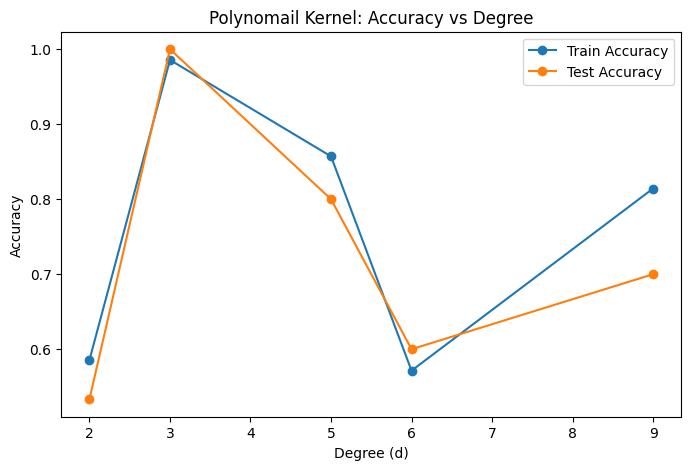

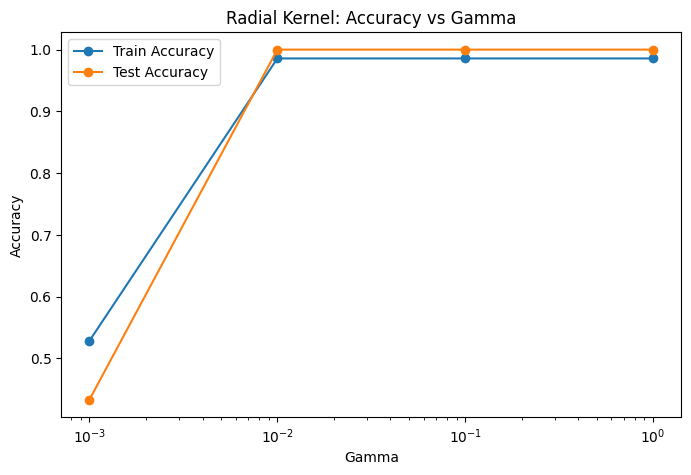

In [32]:
plt.figure(figsize=(8,5))
plt.plot(poly_D, poly_train_acc, label = "Train Accuracy", marker="o")
plt.plot(poly_D, poly_test_acc, label= 'Test Accuracy', marker="o" )
plt.xlabel('Degree (d)')
plt.ylabel('Accuracy')
plt.title('Polynomail Kernel: Accuracy vs Degree')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(radial_G, radial_train_acc, label='Train Accuracy', marker = "o")
plt.plot(radial_G, radial_test_acc, label = 'Test Accuracy', marker = "o")
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Radial Kernel: Accuracy vs Gamma')
plt.xscale('log')
plt.legend()
plt.show()


# iv) For problem i) and ii) pick the best parameters d and g for polynomial and radial basis respectively. For each case create a plot with decision boundary and scatter plot of correctly classified train and test samples.

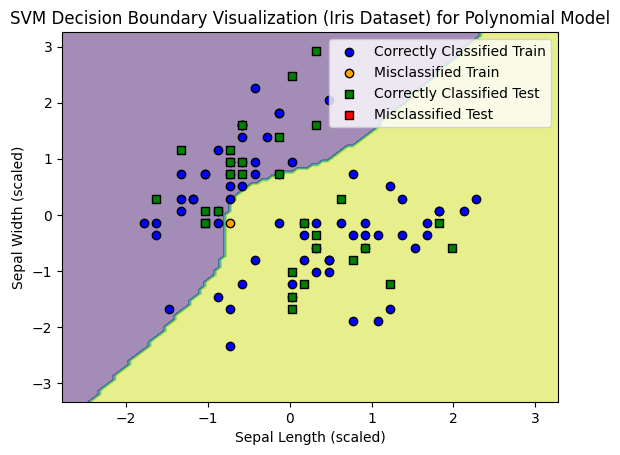

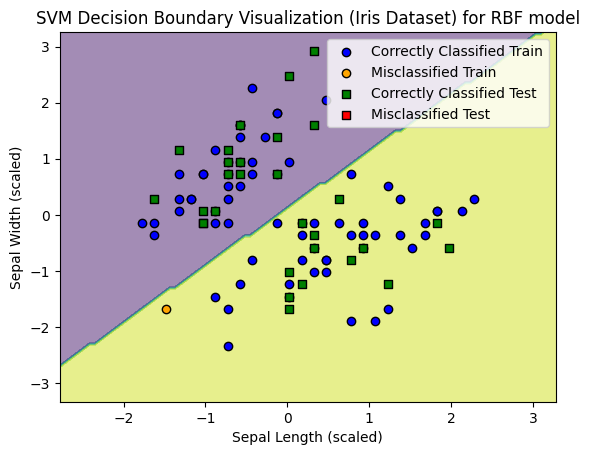

In [33]:
from sklearn.inspection import DecisionBoundaryDisplay








best_d = poly_D[np.argmax(poly_test_acc)]
best_poly_model = SVC(kernel = "poly", C = 1, degree=best_d)
best_poly_model.fit(X_train, y_train)
train_pred_poly = best_poly_model.predict(X_train)
test_pred_poly = best_poly_model.predict(X_test)

best_g = radial_G[np.argmax(radial_test_acc)]
best_rbf_model = SVC(kernel="rbf", C=1, gamma=best_g)
best_rbf_model.fit(X_train,y_train)
train_pred_rbf = best_rbf_model.predict(X_train)
test_pred_rbf = best_rbf_model.predict(X_test)

disp = DecisionBoundaryDisplay.from_estimator(
    best_poly_model, X_train, response_method="predict",
    alpha=0.5
)

plt.scatter(X_train[train_pred_poly == y_train, 0], X_train[train_pred_poly == y_train, 1], 
            c='blue', edgecolor='k', marker='o', label='Correctly Classified Train')
# Misclassified training points
plt.scatter(X_train[train_pred_poly != y_train, 0], X_train[train_pred_poly != y_train, 1], 
            c='orange', edgecolor='k', marker='o', label='Misclassified Train')


# Scatter plot for test points
# Correctly classified test points
plt.scatter(X_test[test_pred_poly == y_test, 0], X_test[test_pred_poly == y_test, 1], 
            c='green', edgecolor='k', marker='s', label='Correctly Classified Test')
# Misclassified test points
plt.scatter(X_test[test_pred_poly != y_test, 0], X_test[test_pred_poly != y_test, 1], 
            c='red', edgecolor='k', marker='s', label='Misclassified Test')
# Labels and title
plt.title('SVM Decision Boundary Visualization (Iris Dataset) for Polynomial Model')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.show()
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(
    best_rbf_model, X_train, response_method="predict",
    alpha=0.5
)

plt.scatter(X_train[train_pred_rbf == y_train, 0], X_train[train_pred_rbf == y_train, 1], 
            c='blue', edgecolor='k', marker='o', label='Correctly Classified Train')
# Misclassified training points
plt.scatter(X_train[train_pred_rbf != y_train, 0], X_train[train_pred_rbf != y_train, 1], 
            c='orange', edgecolor='k', marker='o', label='Misclassified Train')


# Scatter plot for test points
# Correctly classified test points
plt.scatter(X_test[test_pred_rbf == y_test, 0], X_test[test_pred_rbf == y_test, 1], 
            c='green', edgecolor='k', marker='s', label='Correctly Classified Test')
# Misclassified test points
plt.scatter(X_test[test_pred_rbf != y_test, 0], X_test[test_pred_rbf != y_test, 1], 
            c='red', edgecolor='k', marker='s', label='Misclassified Test')
# Labels and title
plt.title('SVM Decision Boundary Visualization (Iris Dataset) for RBF model')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.show()
plt.show()

# Task 2) Use all 4 features and report accuracy

In [34]:

X, y = iris.data, iris.target



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

best_poly_model.fit(X_train, y_train)
best_rbf_model.fit(X_train, y_train)

print(f'Polynomial Kernel (d={best_d}) Train Accuracy:', best_poly_model.score(X_train, y_train))
print(f'Polynomial Kernel (d={best_d}) Test Accuracy:', best_poly_model.score(X_test, y_test))
print(f'RBF Kernel (gamma={best_g}) Train Accuracy:', best_rbf_model.score(X_train, y_train))
print(f'RBF Kernel (gamma={best_g}) Test Accuracy:', best_rbf_model.score(X_test, y_test))

Polynomial Kernel (d=3) Train Accuracy: 0.9047619047619048
Polynomial Kernel (d=3) Test Accuracy: 0.9555555555555556
RBF Kernel (gamma=0.01) Train Accuracy: 0.8952380952380953
RBF Kernel (gamma=0.01) Test Accuracy: 0.8666666666666667


# ii)

It seems when we use less feeatures like in task 1, the train and test accuracy was better than when we used all 4 of the features
